In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary library & packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Importing Leads Dataset

In [3]:
# Read and understand the data
leads = pd.read_csv("Leads.csv")


In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the shape of dataframe
leads.shape

(9240, 37)

In [6]:
# Checking the different columns of a dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# checking the describe of dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# checking the info of dataframe
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### There appear to be quite a few categorical variables in this dataset for which we will need to build dummy variables. There are also a lot of null values, so we'll have to deal them accordingly.

### Step 1: Data Cleaning and Preparation

In [9]:
#check for duplicates values

sum(leads.duplicated(subset = 'Prospect ID')) == 0
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

#### There were no duplicate values identified in Prospect ID or Lead Number.

#### Prospect ID and Lead Number are two variables that are only indicative of the ID number of the people who have been approached and can thus be removed.

In [10]:
# dropping the Prospect ID and Lead Number since the have all unique values
leads.drop(['Prospect ID' , 'Lead Number'], axis = 1, inplace = True)

#### 1)Managing the 'Select' level, which appears in many category variables.
We notice that numerous columns have 'Select' values.It's possible that this is because the consumer did not select any options from the list, therefore 'Select' is displayed.'Select' values are equivalent to NULL. As a result, we can transform these values to null.

In [11]:
# Converting 'Select' values to NaN.
leads = leads.replace('Select' , np.nan)


In [12]:
# Checking the null values of each columns
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# Checking the percentage of null valus in each columns
round((leads.isnull().mean() * 100),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### We can observe that there is a high percentage of missing values in various columns. Columns with missing values larger than 30% can be removed.

In [14]:
# Lets dropping the columns having more than 30% missing values.

# a) Specialization
# b) How did you hear about X Education
# c) Tags
# d) Lead Quality
# e) Lead Profile
# f) City
# g) Asymmetrique Activity Index
# h) Asymmetrique Profile Index
# i) Asymmetrique Activity Score
# j) Asymmetrique Profile Score

leads = leads.drop(['Specialization' , 'How did you hear about X Education' , 'Tags' , 'Lead Quality' , 'Lead Profile' , 'City' , 'Asymmetrique Activity Index' , 'Asymmetrique Profile Index' , 'Asymmetrique Activity Score' , 'Asymmetrique Profile Score'], axis = 1)

In [15]:
# Checking the percentage of null values after dropping the colimns having more than 30% null values
round((leads.isnull().mean() * 100),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Following columns have null values : - Country - Lead Source - Total Visits - Page Views Per Visit - Last Activity- What is your current occupation - What matters most to you in choosing a course

#### Let us examine the situation and decide whether we need to impute values in the above column or remove the columns.

In [16]:
# Lets check the value counts for each values of the country column
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [17]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(leads[leads['Country'] == 'India'])/len(leads['Country']),2)
print(country_percentage)

70.26


In [18]:
# Because "India" appears approximately 70% of the time in the Country column, and the Country column also contains approximately 27% missing data, 
# we will delete the column.

leads = leads.drop(['Country'], axis = 1)

In [19]:
# Lets check the value counts for each values of the What is your current occupation column
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
#imputing Nan values with mode "Unemployed"
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan , 'Unemployed')

In [21]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
# Check the value counts for the column What matters most to you in choosing a course 
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [24]:
#checking count of values
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### We can see that this column is severely skewed, therefore we may eliminate it.

In [25]:
leads = leads.drop(['What matters most to you in choosing a course'], axis = 1)

In [26]:
# Check the value counts for the column Lead Source
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [27]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

In [28]:
# Check the value counts for the column Total Visits

leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [29]:
# Check the median of column 

leads['TotalVisits'].median()

3.0

In [30]:
# We shall impute the null values in TotalVisits by the median value which is 3.0
leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan , leads['TotalVisits'].median())

In [31]:
# Check the value counts for Page Views Per Visit

leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [32]:
# Check the median of the column

leads['Page Views Per Visit'].median()

2.0

In [33]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan , leads['Page Views Per Visit'].median())

In [34]:
# Check the value counts for the column Last Activity

leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [35]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Not Sure')

In [36]:
# Checking the percentage of null values again in all columns
round((leads.isnull().mean() * 100),2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque

## Exploratory Data Analysis

### Univariate Analysis and Bivariate Analysis

#### 1) Lead Source

In [37]:
# Checking the value counts for Lead Source Column
leads['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [38]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

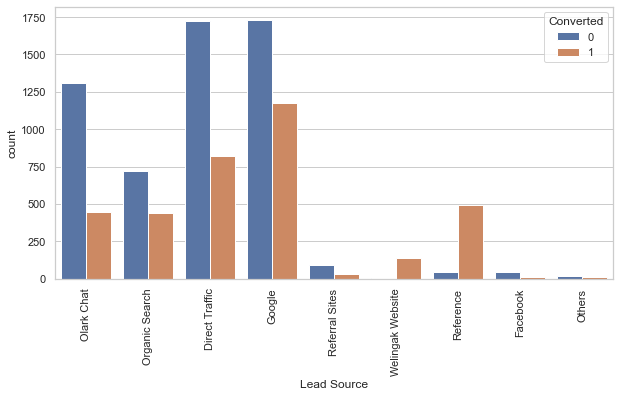

In [40]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. Google and direct traffic create the greatest quantity of leads.
2. The conversion rate of reference leads and leads through welingak website is high.
3. To increase total lead conversion rate, focus on boosting lead conversion of olark chat, organic search, direct traffic, and google leads, as well as generating more leads from reference and welingak website.

#### 2) Last Activity

In [41]:
# checking the value counts for Last Activity
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Not Sure                         103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [42]:
# We can club the last activities to "Other_Activity" which are having less data.
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

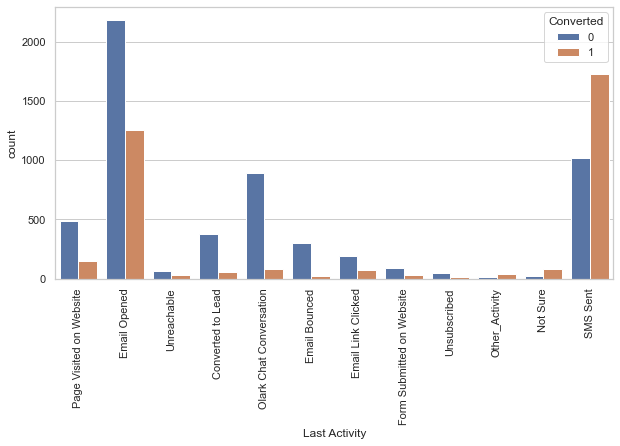

In [43]:
#visualizing count of Variable based on Converted value for Last Activity column
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. As their Last activity, the majority of the leads have opened their email.
2. The conversion rate for leads with the Last activity as SMS Sent is around 60%.

#### 3) Lead Origin

In [45]:
# Checking the value counts for Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

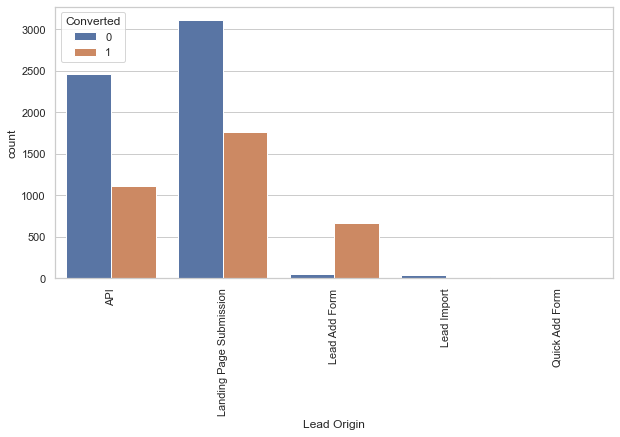

In [46]:
#visualizing count of Variable based on Converted value for Lead Origin
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. API and Landing Page Submission generate more leads and conversions.
2. The Lead Add Form has a very good conversion rate, however the lead count is not particularly high.
3. Lead Import and Quick Add Form both generate a small number of leads.
4. To increase total lead conversion rate, we must boost lead generation from API and Landing Page Submission origins and produce more leads via Lead Add Form.

#### 4) Do Not Email and Do Not Call

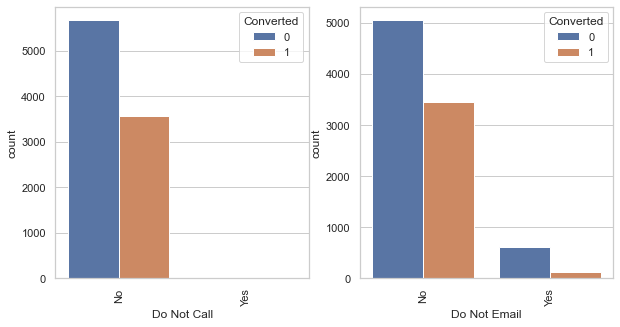

In [47]:
#visualizing count of Variable based on Converted value for Do Not Call & Do Not Email
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

In [48]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [49]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

#### Do Not Call Column to be Dropped since > 90% is of only one Value.

#### 5) Search

In [51]:
# Checking the value counts for Search
leads.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

#### 6) Magazine

In [52]:
# Checking the value counts for Magazine
leads.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

#### 7) Newspaper Article

In [53]:
# Checking the value counts for Newspaper Article
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

#### 8) X Education Forums

In [54]:
# Checking the value counts for X Education Forums
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

#### 9) Newspaper

In [55]:
# Checking the value counts for Newspaper 
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

#### 10) Digital Advertisement

In [56]:
# Checking the value counts for Digital Advertisement 
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

#### 11) Through Recommendations

In [57]:
# Checking the value counts for Through Recommendations 
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

#### 12) Receive More Updates About Our Courses

In [58]:
# Checking the value counts for Receive More Updates About Our Courses 
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

#### 13) Update me on Supply Chain Content

In [59]:
# Checking the value counts for Update me on Supply Chain Content 
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

#### 14) Get updates on DM Content

In [60]:
# Checking the value counts for Get updates on DM Content 
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

#### 15) I agree to pay the amount through cheque

In [61]:
# Checking the value counts for I agree to pay the amount through cheque 
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

#### 16) A free copy of Mastering The Interview

In [62]:
# Checking the value counts for A free copy of Mastering The Interview
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### 17) Last Notable Activity

In [63]:
# Checking the value counts for Last Notable Activity
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [64]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam', 'Unreachable', 'Unsubscribed', 'Email Bounced', 'Resubscribed to emails', 'View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website', 'Email Received'], 'Other_Notable_activity')                                           
                         
                                                                         
                                                                                                                                             
                                                                       
                                                                       

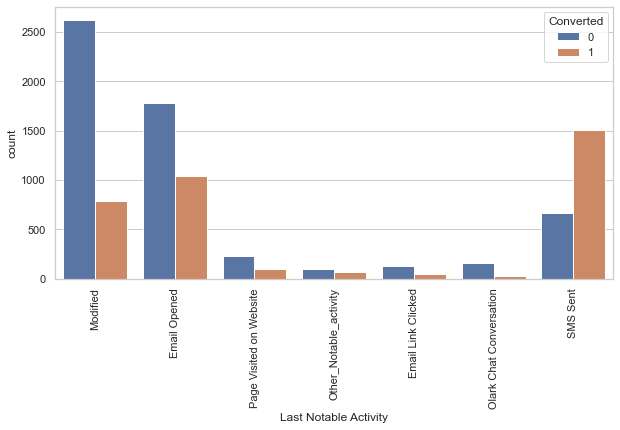

In [65]:
#visualizing count of Variable based on Converted value for Last Notable Activity
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

#### Results
-  Based on the univariate analysis we have seen that many columns have data imbalance and are not adding any information to the model, hence we can drop them for further analysis.


In [66]:
leads = leads.drop(['Do Not Call' , 'Search' , 'Magazine' , 'Newspaper Article' , 'X Education Forums' , 'Newspaper' , 'Digital Advertisement' , 'Through Recommendations' , 'Receive More Updates About Our Courses' , 'Update me on Supply Chain Content' , 'Get updates on DM Content' , 'I agree to pay the amount through cheque'], axis = 1)

In [67]:
leads.shape

(9240, 11)

In [68]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.53896103896104

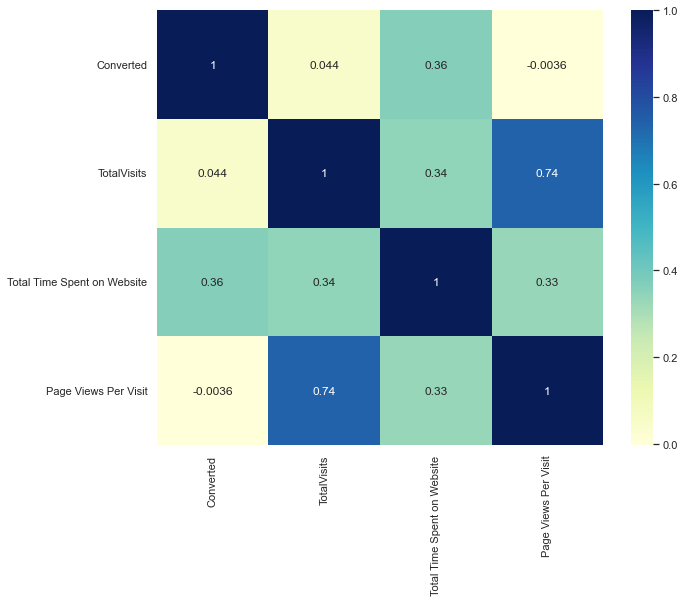

In [74]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Outlier trreatment for Numerical Variables

#### Outlier Treatment for Totalvisits

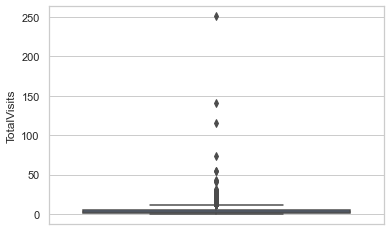

In [71]:
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y='TotalVisits', data = leads)
plt.show()

#### There are outliers present here.

In [72]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

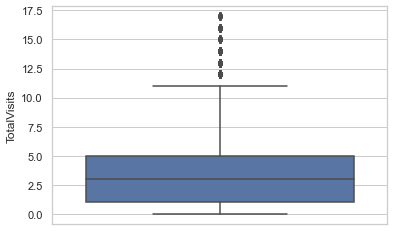

In [73]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

#### Outlier Treatment for Total Time Spent on Website

In [77]:
# Checking the outlier for Total Time Spent on Website
leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9157.000000
mean      486.189036
std       547.695908
min         0.000000
5%          0.000000
25%        10.000000
50%       247.000000
75%       933.000000
90%      1379.000000
95%      1559.400000
99%      1839.440000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

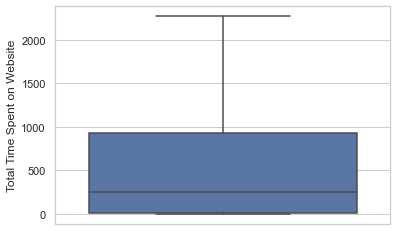

In [76]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

#### We do not do Outlier Treatment for the above Column since there are no significant outliers.

#### Outlier Treatment for Page Views Per Visit

In [78]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

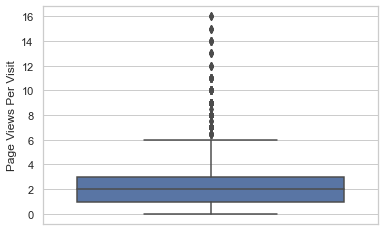

In [79]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

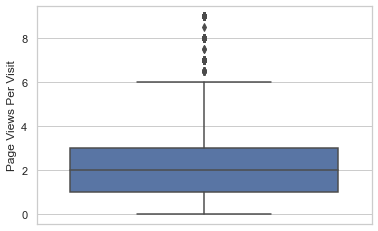

In [80]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

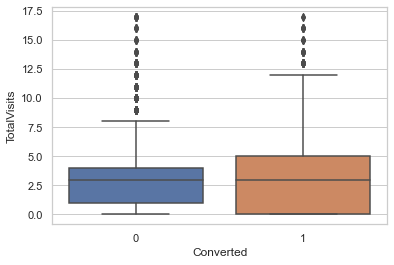

In [81]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

#### Inference 
1. The medians for converted and non-converted leads are nearly identical.
2. Nothng conclusive can be said on the basis of Total Visits.

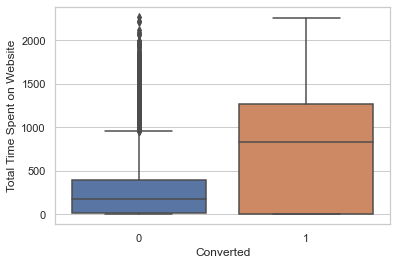

In [84]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(y='Total Time Spent on Website' , x = 'Converted', data = leads)
plt.show()

#### Inference
1. Leads who spend more time on your website are more likely to convert.
2. To encourage leads to spend more time on the website, it should be made more interesting.

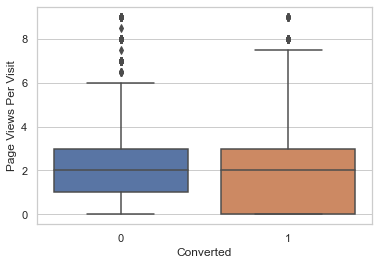

In [85]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

#### Inference
1. The median is the same for converted and unconverted leads.
2. Nothing specific can be said about lead conversion from Page Views Per Visit.

In [86]:
leads.shape

(9090, 11)

In [87]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   object 
 1   Lead Source                             9090 non-null   object 
 2   Do Not Email                            9090 non-null   object 
 3   Converted                               9090 non-null   int64  
 4   TotalVisits                             9090 non-null   float64
 5   Total Time Spent on Website             9090 non-null   int64  
 6   Page Views Per Visit                    9090 non-null   float64
 7   Last Activity                           9090 non-null   object 
 8   What is your current occupation         9090 non-null   object 
 9   A free copy of Mastering The Interview  9090 non-null   object 
 10  Last Notable Activity                   9090 non-null   obje

## Data Preparation

### 1) Converting some binary variables (Yes/No) to 1/0

In [88]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [89]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


### 2) Creating Dummy variables for the categorical features:

#### Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity'

In [90]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[['Lead Origin' , 'Lead Source' , 'Last Activity' , 'What is your current occupation' , 'Last Notable Activity']], drop_first= True)

# Adding the results to the master dataframe
leads = pd.concat([leads , dummy], axis = 1)

In [91]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,...,0,0,1,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,...,0,0,1,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,...,0,1,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,...,0,0,1,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,...,0,0,1,0,0,1,0,0,0,0


#### Dropping the columns for which dummies were created

In [92]:
leads = leads.drop(['Lead Origin' , 'Lead Source' , 'Last Activity' , 'What is your current occupation' , 'Last Notable Activity'], axis = 1)


In [93]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### Splitting the data into train and test set.

In [94]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)
X.head()




,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [95]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [96]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scalling

In [97]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,0,1.336782,-0.428736,0.044021,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6087,1,-1.094877,-0.887355,-1.206716,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1033,0,0.642022,-0.025151,1.477269,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7656,1,0.989402,-0.241619,2.014065,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3241,0,0.294642,0.897591,-0.492776,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Feature Selection Using RFE

In [98]:
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [99]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True, False,  True])

In [100]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 23),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Origin_Quick Add Form', False, 5),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 4),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Not Sure', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activi

In [101]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Not Sure', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [102]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'What is your current occupation_Other',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### Model Building

#### Assessing the model with StatsModels

#### Model 1

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.9
Date:                Fri, 08 Dec 2023   Deviance:                       5277.7
Time:                        18:10:50   Pearson chi2:                 6.56e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3936
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2313      0.593     -0.390      0.697      -1.394       0.931
Do Not Email                                            -1.4771      0.197     -7.487      0.000      -1.864      -1.090
Total Time Spent on Website                              1.1038      0.040     27.692      0.000       1.026       1.182
Lead Origin_Lead Add Form                                3.9406      0.215     18.352      0.000       3.520       4.361
Lead Source_Olark Chat                                   1.1753      0.104     11.346      0.000       0.972       1.378
Lead Source_Welingak Website                             2.8755      1.028      2.798      0.005       0.861       4.890
Last Activity_Email Bounced                             -1.3333      0.386     -3.454      0.001      -2.090      -0.577
Last Activity_Not Sure                                  -1.9680      0.456     -4.315      0.000      -2.862      -1.074
Last Activity_Olark Chat Conversation                   -1.3728      0.160     -8.596      0.000      -1.686      -1.060
Last Activity_Other_Activity                             0.6822      0.517      1.320      0.187      -0.331       1.695
What is your current occupation_Housewife               21.8563    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_Student                 -0.9320      0.634     -1.471      0.141      -2.174       0.310
What is your current occupation_Unemployed              -1.2472      0.594     -2.100      0.036      -2.411      -0.083
What is your current occupation_Working Professional     1.5121      0.620      2.439      0.015       0.297       2.727
Last Notable Activity_Other_Notable_activity             1.6521      0.317      5.220      0.000       1.032       2.272
Last Notable Activity_SMS Sent                           1.6551      0.081     20.531      0.000       1.497       1.813
========================================================================================================================
"""

#### Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [104]:
# Dropping the column 'What is your current occupation_Housewife'
col = col.drop('What is your current occupation_Housewife', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Not Sure', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Model 2

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.6
Date:                Fri, 08 Dec 2023   Deviance:                       5283.2
Time:                        18:23:51   Pearson chi2:                 6.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3931
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3969      0.528      0.751      0.453      -0.639       1.432
Do Not Email                                            -1.4820      0.198     -7.499      0.000      -1.869      -1.095
Total Time Spent on Website                              1.1030      0.040     27.687      0.000       1.025       1.181
Lead Origin_Lead Add Form                                3.9418      0.215     18.369      0.000       3.521       4.362
Lead Source_Olark Chat                                   1.1736      0.104     11.331      0.000       0.971       1.377
Lead Source_Welingak Website                             2.8768      1.028      2.799      0.005       0.862       4.891
Last Activity_Email Bounced                             -1.3302      0.386     -3.445      0.001      -2.087      -0.573
Last Activity_Not Sure                                  -1.9870      0.457     -4.349      0.000      -2.882      -1.092
Last Activity_Olark Chat Conversation                   -1.3761      0.160     -8.610      0.000      -1.689      -1.063
Last Activity_Other_Activity                             0.6809      0.517      1.318      0.188      -0.332       1.694
What is your current occupation_Student                 -1.5591      0.574     -2.716      0.007      -2.684      -0.434
What is your current occupation_Unemployed              -1.8744      0.530     -3.539      0.000      -2.913      -0.836
What is your current occupation_Working Professional     0.8847      0.559      1.584      0.113      -0.210       1.980
Last Notable Activity_Other_Notable_activity             1.6538      0.317      5.224      0.000       1.033       2.274
Last Notable Activity_SMS Sent                           1.6548      0.081     20.529      0.000       1.497       1.813
========================================================================================================================
"""

#### Since Pvalue of Last Activity_Other_Activity is high so, we can drop this column

In [106]:
# Dropping the column 'Last Activity_Other_Activity'
col = col.drop('Last Activity_Other_Activity', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Not Sure', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Model 3

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.5
Date:                Fri, 08 Dec 2023   Deviance:                       5285.0
Time:                        18:29:19   Pearson chi2:                 6.49e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3929
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3976      0.528      0.753      0.452      -0.638       1.433
Do Not Email                                            -1.5024      0.197     -7.610      0.000      -1.889      -1.115
Total Time Spent on Website                              1.1037      0.040     27.715      0.000       1.026       1.182
Lead Origin_Lead Add Form                                3.9499      0.214     18.418      0.000       3.530       4.370
Lead Source_Olark Chat                                   1.1736      0.104     11.333      0.000       0.971       1.377
Lead Source_Welingak Website                             2.8690      1.028      2.791      0.005       0.855       4.883
Last Activity_Email Bounced                             -1.3587      0.386     -3.516      0.000      -2.116      -0.601
Last Activity_Not Sure                                  -1.9977      0.457     -4.371      0.000      -2.893      -1.102
Last Activity_Olark Chat Conversation                   -1.3791      0.160     -8.628      0.000      -1.692      -1.066
What is your current occupation_Student                 -1.5590      0.574     -2.715      0.007      -2.684      -0.434
What is your current occupation_Unemployed              -1.8720      0.530     -3.534      0.000      -2.910      -0.834
What is your current occupation_Working Professional     0.8930      0.559      1.598      0.110      -0.202       1.988
Last Notable Activity_Other_Notable_activity             1.7622      0.303      5.807      0.000       1.167       2.357
Last Notable Activity_SMS Sent                           1.6527      0.081     20.503      0.000       1.495       1.811
========================================================================================================================
"""

#### Since Pvalue of What is your current occupation_Working Professional is high so, we can drop this column

In [108]:
# Droping the column 'What is your current occupation_Working Professional'
col = col.drop('What is your current occupation_Working Professional', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Not Sure', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 4 

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.7
Date:                Fri, 08 Dec 2023   Deviance:                       5287.4
Time:                        18:34:05   Pearson chi2:                 6.47e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            1.2087      0.173      6.985      0.000       0.870       1.548
Do Not Email                                    -1.5043      0.198     -7.613      0.000      -1.892      -1.117
Total Time Spent on Website                      1.1035      0.040     27.711      0.000       1.025       1.182
Lead Origin_Lead Add Form                        3.9499      0.214     18.420      0.000       3.530       4.370
Lead Source_Olark Chat                           1.1748      0.104     11.348      0.000       0.972       1.378
Lead Source_Welingak Website                     2.8707      1.028      2.793      0.005       0.856       4.885
Last Activity_Email Bounced                     -1.3481      0.386     -3.496      0.000      -2.104      -0.592
Last Activity_Not Sure                          -2.0060      0.458     -4.383      0.000      -2.903      -1.109
Last Activity_Olark Chat Conversation           -1.3798      0.160     -8.627      0.000      -1.693      -1.066
What is your current occupation_Student         -2.3707      0.283     -8.379      0.000      -2.925      -1.816
What is your current occupation_Unemployed      -2.6841      0.175    -15.297      0.000      -3.028      -2.340
Last Notable Activity_Other_Notable_activity     1.7667      0.303      5.828      0.000       1.172       2.361
Last Notable Activity_SMS Sent                   1.6555      0.081     20.555      0.000       1.498       1.813
================================================================================================================
"""

#### Since PValue of Lead Source_Welingak Website is high, so we can drop this column.

In [111]:
# Droping the column 'What is your current occupation_Working Professional'
col = col.drop('Lead Source_Welingak Website', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Not Sure',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model 5

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.1
Date:                Fri, 08 Dec 2023   Deviance:                       5306.2
Time:                        18:39:29   Pearson chi2:                 6.73e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            1.1951      0.173      6.895      0.000       0.855       1.535
Do Not Email                                    -1.4837      0.196     -7.583      0.000      -1.867      -1.100
Total Time Spent on Website                      1.1024      0.040     27.686      0.000       1.024       1.180
Lead Origin_Lead Add Form                        4.3202      0.208     20.728      0.000       3.912       4.729
Lead Source_Olark Chat                           1.1742      0.104     11.344      0.000       0.971       1.377
Last Activity_Email Bounced                     -1.3603      0.384     -3.539      0.000      -2.114      -0.607
Last Activity_Not Sure                          -2.0392      0.445     -4.585      0.000      -2.911      -1.167
Last Activity_Olark Chat Conversation           -1.3818      0.160     -8.633      0.000      -1.695      -1.068
What is your current occupation_Student         -2.3755      0.285     -8.348      0.000      -2.933      -1.818
What is your current occupation_Unemployed      -2.6693      0.176    -15.182      0.000      -3.014      -2.325
Last Notable Activity_Other_Notable_activity     1.7704      0.302      5.855      0.000       1.178       2.363
Last Notable Activity_SMS Sent                   1.6540      0.080     20.560      0.000       1.496       1.812
================================================================================================================
"""

#### We can check the Variance Inflation Factor to see whether there is any association between the variables because 'All' of the p-values are smaller.

### Checking the VIF Values

In [113]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.84
8,What is your current occupation_Unemployed,1.76
3,Lead Source_Olark Chat,1.74
4,Last Activity_Email Bounced,1.70
6,Last Activity_Olark Chat Conversation,1.42
10,Last Notable Activity_SMS Sent,1.36
2,Lead Origin_Lead Add Form,1.28
1,Total Time Spent on Website,1.26
5,Last Activity_Not Sure,1.16
9,Last Notable Activity_Other_Notable_activity,1.12


#### All variables have a good value of VIF. So we need not drop any more variables and Moving on to derive the Probabilities, Lead Score, Predictions on Train Data.

In [114]:
# getting Predicted values from the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.124898
6087    0.015950
1033    0.182136
7656    0.172175
3241    0.763006
5738    0.084271
7366    0.085787
3680    0.101800
4170    0.746541
43      0.118839
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12489775, 0.01595032, 0.18213575, 0.17217456, 0.76300579,
       0.08427122, 0.08578705, 0.10179977, 0.74654122, 0.11883916])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.124898,302
1,0,0.015950,6087
2,0,0.182136,1033
3,0,0.172175,7656
4,1,0.763006,3241


### Using an arbitrary probability cut-off of 0.5 to identify the expected labels

#### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [117]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.124898,302,0
1,0,0.015950,6087,0
2,0,0.182136,1033,0
3,0,0.172175,7656,0
4,1,0.763006,3241,1


### Creating the Confusion matrix

In [118]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3473  462]
 [ 738 1690]]


In [119]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3473      462
# converted            738       1690  

In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8114097123998114


## Metrics beyond simply accuracy

In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6960461285008237

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.8825921219822109

In [124]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11740787801778907


In [125]:
# positive predictive value 
print (TP / float(TP+FP))

0.7853159851301115


In [126]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8247447162194254


#### We discovered that while our specificity was high (~88%), our sensitivity was just (~70%). As a result, this had to be addressed. 

#### We obtained a sensitivity of (~ 70%), which was primarily due to the arbitrary cut-off point of 0.5. This cut-off point must now be optimized in order to achieve a reasonable level of sensitivity, and the ROC curve will be used to accomplish this.

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

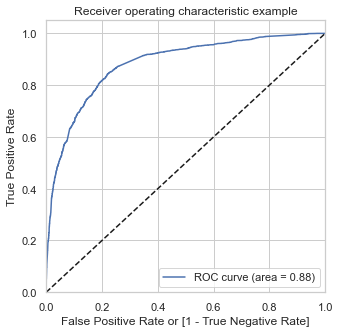

In [129]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Because we have a larger (0.88) area under the ROC curve, our model is good.

### Finding Optimal Cutoff Point

#### We set an arbitrary cut-off value of 0.5 above. The section that follows deals with determining the optimal cut-off value. The optimal cutoff probability is the one with balanced sensitivity and specificity.

In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.124898,302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.015950,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.182136,1033,0,1,1,0,0,0,0,0,0,0,0
3,0,0.172175,7656,0,1,1,0,0,0,0,0,0,0,0
4,1,0.763006,3241,1,1,1,1,1,1,1,1,1,0,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.589816  0.962932  0.359593
0.2   0.2  0.746189  0.917216  0.640661
0.3   0.3  0.802923  0.845552  0.776620
0.4   0.4  0.808424  0.766474  0.834307
0.5   0.5  0.811410  0.696046  0.882592
0.6   0.6  0.795694  0.580313  0.928590
0.7   0.7  0.783593  0.510708  0.951970
0.8   0.8  0.765205  0.432867  0.970267
0.9   0.9  0.708628  0.254942  0.988564


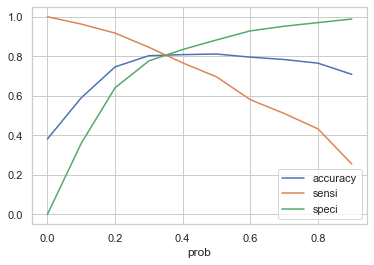

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [133]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.124898,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.015950,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.182136,1033,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.172175,7656,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.763006,3241,1,1,1,1,1,1,1,1,1,0,0,1


#### Assigning Lead Score to the Training data

In [134]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.124898,302,0,1,1,0,0,0,0,0,0,0,0,0,12
1,0,0.015950,6087,0,1,0,0,0,0,0,0,0,0,0,0,2
2,0,0.182136,1033,0,1,1,0,0,0,0,0,0,0,0,0,18
3,0,0.172175,7656,0,1,1,0,0,0,0,0,0,0,0,0,17
4,1,0.763006,3241,1,1,1,1,1,1,1,1,1,0,0,1,76


### Model Evaluation

In [135]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8068521137828069

In [136]:
# confusion metrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3146,  789],
       [ 440, 1988]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8187808896210873

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.7994917407878018

In [140]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.20050825921219823


In [141]:
# positive predictive value 
print (TP / float(TP+FP))

0.715880446525027


In [142]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8773006134969326


### Precision and Recall

#### -  Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
#### -  Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [143]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3146,  789],
       [ 440, 1988]], dtype=int64)

In [144]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.715880446525027

In [145]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8187808896210873

#### Using sklearn utilities for the same

In [146]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.715880446525027

In [147]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8187808896210873

### Precision and recall tradeoff

In [148]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted


(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    0
 6361    1
 6362    0
 Name: final_Predicted, Length: 6363, dtype: int64)

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

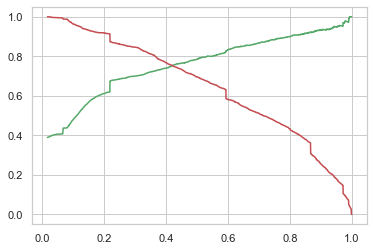

In [150]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### The graph above depicts the trade-off between Precision and Recall.

### Making predictions on the test set

#### Scaling the test data

In [151]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]) 
                                                                                                        
                                                                                                        

In [152]:
# Assigning the final model's column selections to the X_test 
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
6906,0,1.919395,0,0,0,0,0,0,1,0,1
1873,0,-0.546142,0,0,0,0,0,0,1,0,0
771,0,-0.797465,0,0,0,0,0,0,1,0,0
4495,0,-0.623190,0,0,0,0,0,0,1,0,0
9061,0,2.392690,0,0,0,0,0,0,1,0,0


In [153]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

### Prediction On Test Set

In [154]:
y_test_pred = res.predict(X_test_sm)

In [155]:
y_test_pred[:10]

6906    0.908515
1873    0.111425
771     0.086802
4495    0.103289
9061    0.761953
4929    0.451768
2308    0.152609
1034    0.081353
9033    0.086163
7008    0.920068
dtype: float64

In [156]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
y_pred_1.head()

,0
6906,0.908515
1873,0.111425
771,0.086802
4495,0.103289
9061,0.761953


In [158]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [159]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [160]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [162]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.908515
1,0,1873,0.111425
2,0,771,0.086802
3,0,4495,0.103289
4,1,9061,0.761953


In [163]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [164]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,6906,0.908515
1,0,1873,0.111425
2,0,771,0.086802
3,0,4495,0.103289
4,1,9061,0.761953


In [165]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

In [166]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,6906,1,0.908515
1,1873,0,0.111425
2,771,0,0.086802
3,4495,0,0.103289
4,9061,1,0.761953


In [167]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [168]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_Predicted
0,6906,1,0.908515,1
1,1873,0,0.111425,0
2,771,0,0.086802,0
3,4495,0,0.103289,0
4,9061,1,0.761953,1


In [169]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8005133846718006

In [170]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1314,  346],
       [ 198,  869]], dtype=int64)

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8144329896907216

In [173]:
# Let us calculate specificity
TN / float(TN+FP)

0.791566265060241

In [174]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7152263374485597

In [175]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8144329896907216

### Assigning Lead Score to the Testing data

In [176]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_Predicted,Lead_Score
0,6906,1,0.908515,1,91
1,1873,0,0.111425,0,11
2,771,0,0.086802,0,9
3,4495,0,0.103289,0,10
4,9061,1,0.761953,1,76


### Observations:

After running the model on the Test Data , we obtain:
 
-  Accuracy : 80.05 %
-  Sensitivity : 81.44 %
-  Specificity : 79.16 %

### Results :

1) Comparing the values obtained for Train & Test:

#### Train Data:

- Accuracy : 80.68 %

- Sensitivity : 81.88 %

- Specificity : 79.95 %


#### Test Data:

-  Accuracy : 80.05 %
-  Sensitivity : 81.44 %
-  Specificity : 79.16 %

#### As a result, we have met our goal of achieving a target lead conversion rate of roughly 80%. The model appears to accurately anticipate the conversion rate, and we should be able to provide the CEO confidence in making appropriate decisions based on this model in order to achieve a higher lead conversion rate of 80%. 

### Finding thr most important Features in the model

In [177]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                       4.320207
Last Notable Activity_Other_Notable_activity    1.770395
Last Notable Activity_SMS Sent                  1.653968
const                                           1.195111
Lead Source_Olark Chat                          1.174161
Total Time Spent on Website                     1.102374
Last Activity_Email Bounced                    -1.360255
Last Activity_Olark Chat Conversation          -1.381787
Do Not Email                                   -1.483688
Last Activity_Not Sure                         -2.039229
What is your current occupation_Student        -2.375484
What is your current occupation_Unemployed     -2.669329
dtype: float64